In [1]:
#The line below downloads pyedflib to datahub
#!pip install pyedflib --user
import pandas as pd
import numpy as np
import os
import pyedflib
import math
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import re

### The function to covert Bdf files to pd.DataFrame

The function `bdf_to_df` should be useful to convert Bdf files to a python pandas dataframe using pyedflib

All the files should be in the data folder in this repository

In [2]:
def bdf_to_df(file_path):
    file_name = os.path.join('data', file_path)
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    rec = pd.DataFrame(sigbufs).T
    rec.columns = signal_labels
    return rec

### Load in raw data

In [3]:
rec1 = bdf_to_df('eeg_recording_1.bdf')

Function `check_status` Check how many different emotions are presented in the Status column

In [4]:
def check_status(df):
    print(len(df.Status.unique()))
    print(df.Status.unique())
    
check_status(rec1)

28
[3473408. 3407872. 3407873. 3407874. 3407972. 3407902. 3407876. 3407877.
 3407878. 3407879. 3407880. 3407881. 3407896. 3407882. 3407883. 3407884.
 3407885. 3407886. 3407887. 3407889. 3407888. 3407891. 3407890. 3407893.
 3407895. 3407894. 3407897. 3407898.]


Print out the first 5 rows of the first recording file, check all its columns

In [5]:
rec1.loc[:5]

,1A1,1A2,1A3,1A4,1A5,1A6,1A7,1A8,1A9,1A10,...,1EX8,Ana1-2,Ana3-4,Ana5-6,Ana7-8,Ana9-10,Ana11-12,Ana13-14,Ana15-16,Status
0,-18876.730746,-18592.168772,-16102.454623,-15834.736367,-12413.086440,-9622.435346,-3279.728316,-15042.894080,-10482.902506,-14128.927019,...,8637.437164,-1.017289e+06,52.213672,-143.289575,-274.896638,-574.827228,348.806402,485.658675,62.227253,3473408.0
1,-18882.855735,-18598.293761,-16107.892113,-15841.642605,-12419.711427,-9630.841581,-3288.322050,-15048.550320,-10487.714997,-14128.958269,...,9453.591906,-1.017446e+06,48.398974,-152.349481,-268.220917,-585.317647,347.375890,488.996535,62.227253,3473408.0
2,-18881.918237,-18599.512509,-16108.860861,-15843.142602,-12420.930175,-9633.029077,-3290.103297,-15048.050321,-10489.933743,-14133.770760,...,9719.872664,-1.017297e+06,43.630603,-146.150598,-266.790406,-586.748158,344.038030,483.751326,64.611439,3473408.0
3,-18873.762002,-18591.293774,-16098.454630,-15833.830119,-12411.117693,-9624.247843,-3280.290815,-15039.456587,-10483.215006,-14123.145780,...,8946.686593,-1.017093e+06,52.213672,-147.581109,-275.850312,-591.516530,349.760076,484.228163,66.995625,3473408.0
4,-18872.543254,-18589.731277,-16096.360884,-15829.517627,-12408.898947,-9618.935353,-3276.759571,-15038.737838,-10483.371255,-14120.302035,...,8556.812313,-1.017183e+06,49.352649,-143.766412,-270.605103,-581.979786,346.899053,488.519698,60.319904,3473408.0
5,-18880.543239,-18599.012510,-16103.423371,-15836.205115,-12416.930183,-9625.966590,-3283.353309,-15047.706572,-10493.371237,-14124.739527,...,9282.279723,-1.017544e+06,66.041950,-140.905389,-272.035615,-577.211414,346.899053,490.903884,59.843067,3473408.0


In [6]:
#print all its columns
x= [print(i, end=' ') for i in rec1.columns]

1A1 1A2 1A3 1A4 1A5 1A6 1A7 1A8 1A9 1A10 1A11 1A12 1A13 1A14 1A15 1A16 1A17 1A18 1A19 1A20 1A21 1A22 1A23 1A24 1A25 1A26 1A27 1A28 1A29 1A30 1A31 1A32 1B1 1B2 1B3 1B4 1B5 1B6 1B7 1B8 1B9 1B10 1B11 1B12 1B13 1B14 1B15 1B16 1B17 1B18 1B19 1B20 1B21 1B22 1B23 1B24 1B25 1B26 1B27 1B28 1B29 1B30 1B31 1B32 1C1 1C2 1C3 1C4 1C5 1C6 1C7 1C8 1C9 1C10 1C11 1C12 1C13 1C14 1C15 1C16 1C17 1C18 1C19 1C20 1C21 1C22 1C23 1C24 1C25 1C26 1C27 1C28 1C29 1C30 1C31 1C32 1D1 1D2 1D3 1D4 1D5 1D6 1D7 1D8 1D9 1D10 1D11 1D12 1D13 1D14 1D15 1D16 1D17 1D18 1D19 1D20 1D21 1D22 1D23 1D24 1D25 1D26 1D27 1D28 1D29 1D30 1D31 1D32 1E1 1E2 1E3 1E4 1E5 1E6 1E7 1E8 1E9 1E10 1E11 1E12 1E13 1E14 1E15 1E16 1E17 1E18 1E19 1E20 1E21 1E22 1E23 1E24 1E25 1E26 1E27 1E28 1E29 1E30 1E31 1E32 1F1 1F2 1F3 1F4 1F5 1F6 1F7 1F8 1F9 1F10 1F11 1F12 1F13 1F14 1F15 1F16 1F17 1F18 1F19 1F20 1F21 1F22 1F23 1F24 1F25 1F26 1F27 1F28 1F29 1F30 1F31 1F32 1G1 1G2 1G3 1G4 1G5 1G6 1G7 1G8 1G9 1G10 1G11 1G12 1G13 1G14 1G15 1G16 1G17 1G18 1G19 1G20 1G2

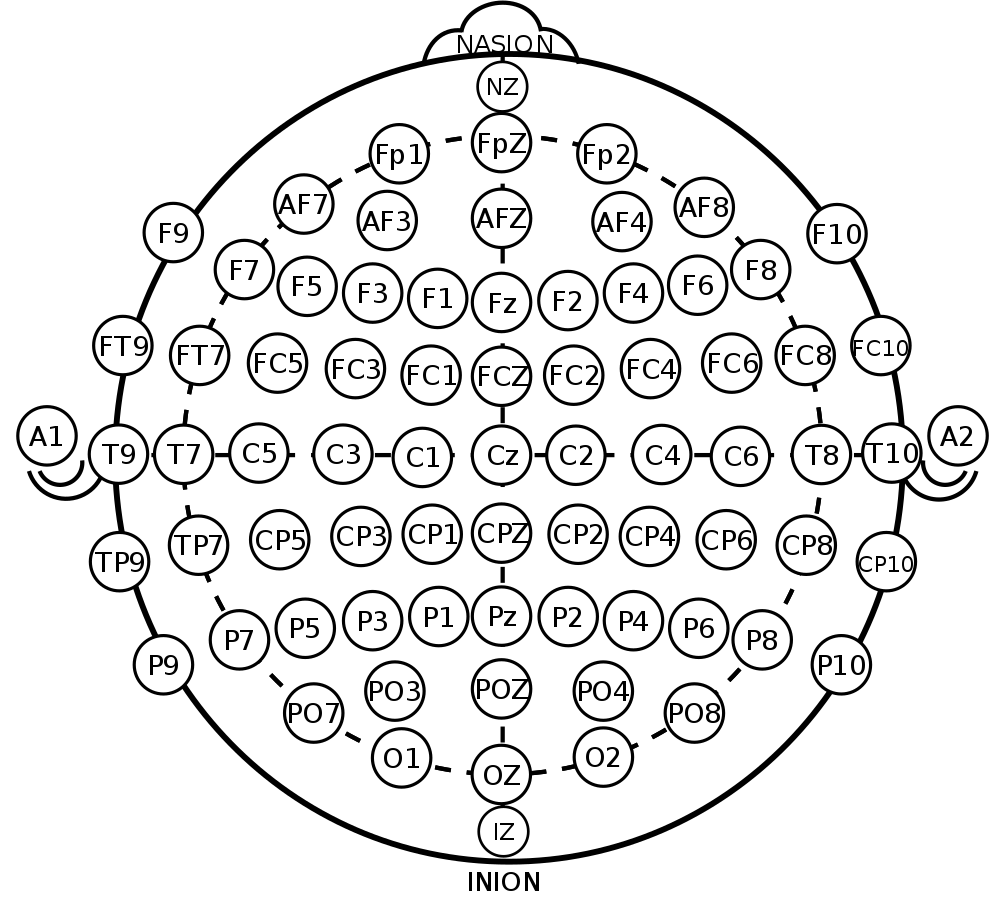

In [7]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/International_10-20_system_for_EEG-MCN.svg/1005px-International_10-20_system_for_EEG-MCN.svg.png", width = 300)

### Columns selection

The function below `load_elp` tries to find all the labels from the elp file. 

In [8]:
#this function tries to extract info from the elp file, but i dont really know to translate
#these coordinate to 10 20 system, so i will seek for alternative method
def load_elp(file_path):
    file_name = os.path.join('data', file_path)   
    #open the elp file as a python string
    s = open(file_name, 'r').read()
    start_idx = s.index('//Sensor type')   
    #split the long string to find each sensor
    splitted = s[start_idx:].split('//Sensor type')
    splitted = [s for s in splitted if '#' in s]   
    lst = []
    for line in splitted:
        sublst = []
        num = line[line.index('#'): line.index('#') + 5]
        num = int(re.findall(r'\b\d+\b', num)[0])
        sublst.append(num)
        typ = line[line.index('Sensor') - 8 : line.index('Sensor') - 3]
        sublst.append(typ)
        name = line[line.index('n%N'):]
        sublst.append(name)
        lst.append(sublst)           
    return lst

Turns out this method did not work, and the data we read from elp by eye is not useful for knowing which columns to select. Therefore we seek help from the TA and the internet. We have found the location data for standard 10 20's 64 channels and the 256 channel used in our recording. (The source where we got all the location data for the folder channel_data is https://www.biosemi.com/download/Cap_coords_all.xls)

In [9]:
#check the channel_data folder for details about the channels
channel64 = pd.read_csv(os.path.join('channel_data', '64channels.csv'))
channel256 = pd.read_csv(os.path.join('channel_data', '256channels.csv'))

In [10]:
lst64 = []
for i in open(os.path.join('channel_data', '64channels.csv')).readlines()[1:]:
    i = i[:-1].split(',')
    lst64.append(i)
x= [print(i, end='') for i in lst64]

['Fp1', '18', '-2']['AF7', '36', '-2']['AF3', '25', '16']['F1', '22', '40']['F3', '39', '30']['F5', '49', '15']['F7', '54', '-2']['FT7', '72', '-2']['FC5', '69', '18']['FC3', '62', '40']['FC1', '45', '58']['C1', '90', '67']['C3', '90', '44']['C5', '90', '21']['T7 (T3)', '90', '-2']['TP7', '108', '-2']['CP5', '111', '18']['CP3', '118', '40']['CP1', '135', '58']['P1', '158', '40']['P3', '141', '30']['P5', '131', '15']['P7', '126', '-2']['P9', '126', '-25']['PO7', '144', '-2']['PO3', '155', '16']['O1', '162', '-2']['Iz (inion)', '-180', '-25']['Oz', '-180', '-2']['POz', '-180', '21']['Pz', '-180', '44']['CPz', '-180', '67']['Fpz', '0', '-2']['Fp2', '-18', '-2']['AF8', '-36', '-2']['AF4', '-25', '16']['Afz', '0', '21']['Fz', '0', '44']['F2', '-22', '40']['F4', '-39', '30']['F6', '-49', '15']['F8', '-54', '-2']['FT8', '-72', '-2']['FC6', '-69', '18']['FC4', '-62', '40']['FC2', '-45', '58']['FCz', '0', '67']['Cz', '-90', '90']['C2', '-90', '67']['C4', '-90', '44']['C6', '-90', '21']['T8 (T4)

We now have all the `[Electrode,sph_theta,sph_phi]` data for every electrode in the 64 channel system saved as a list. For each location in the 64 channels, we will find the closest channel in the 256 channel system

In [11]:
#Get all locations from 256 channel
lst256 = []
for i in open(os.path.join('channel_data', '256channels.csv')).readlines()[1:]:
    i = i[:-1].split(',')
    lst256.append(i)

In [12]:
#Find the best 64 channels to keep from 256 channels
bestcol64 = []
for i in lst64:
    a, b = int(i[1]), int(i[2])
    optimized = ['', float('inf')]
    for j in lst256:
        c, d = int(j[1]), int(j[2])
        if (c - a) ** 2 + (d - b) ** 2 < optimized[1]:
            optimized = [j[0], (c - a) ** 2 + (d - b) ** 2]
    bestcol64.append(optimized[0])
for i in range(len(bestcol64)):
    if '(' in bestcol64[i]:
        bestcol64[i] = bestcol64[i][:bestcol64[i].find('(')-1]  
len(bestcol64)

64

In [13]:
x= [print(i, end=' ') for i in bestcol64]

E29 F10 E31 E23 F7 F14 F28 F31 G8 F23 F3 F21 G16 G13 G11 G23 G25 H6 H2 A7 H19 H9 G30 G32 H16 H27 H29 A16 A19 A21 A6 A3 E12 D32 D24 D30 E14 E17 E6 D27 D20 D12 D9 D7 D5 E3 E1 A1 C25 C23 C20 C18 C13 C15 B23 B21 A24 B18 B26 C11 B30 B15 B7 B9 

There are 32 electrode for each letter from A to G but only 24 for G and 8 for EX. Replace H27 and H29 with the corresponding electrode in EX.


In [14]:
#I am not sure if I am doing this correctly, but I will just do it here

#for i in bestcol64:
    #print(('1' + i) in rec1.columns)
bestcol64[bestcol64.index('H27')] = 'EX3'
bestcol64[bestcol64.index('H29')] = 'EX5'

After manuel check some of the electrode from the best 64 channels, we confirm that these channels are closest to the locations in 20 10 system. We will keep only these columns

In [15]:
x= [print(i, end=' ') for i in rec1.columns]

1A1 1A2 1A3 1A4 1A5 1A6 1A7 1A8 1A9 1A10 1A11 1A12 1A13 1A14 1A15 1A16 1A17 1A18 1A19 1A20 1A21 1A22 1A23 1A24 1A25 1A26 1A27 1A28 1A29 1A30 1A31 1A32 1B1 1B2 1B3 1B4 1B5 1B6 1B7 1B8 1B9 1B10 1B11 1B12 1B13 1B14 1B15 1B16 1B17 1B18 1B19 1B20 1B21 1B22 1B23 1B24 1B25 1B26 1B27 1B28 1B29 1B30 1B31 1B32 1C1 1C2 1C3 1C4 1C5 1C6 1C7 1C8 1C9 1C10 1C11 1C12 1C13 1C14 1C15 1C16 1C17 1C18 1C19 1C20 1C21 1C22 1C23 1C24 1C25 1C26 1C27 1C28 1C29 1C30 1C31 1C32 1D1 1D2 1D3 1D4 1D5 1D6 1D7 1D8 1D9 1D10 1D11 1D12 1D13 1D14 1D15 1D16 1D17 1D18 1D19 1D20 1D21 1D22 1D23 1D24 1D25 1D26 1D27 1D28 1D29 1D30 1D31 1D32 1E1 1E2 1E3 1E4 1E5 1E6 1E7 1E8 1E9 1E10 1E11 1E12 1E13 1E14 1E15 1E16 1E17 1E18 1E19 1E20 1E21 1E22 1E23 1E24 1E25 1E26 1E27 1E28 1E29 1E30 1E31 1E32 1F1 1F2 1F3 1F4 1F5 1F6 1F7 1F8 1F9 1F10 1F11 1F12 1F13 1F14 1F15 1F16 1F17 1F18 1F19 1F20 1F21 1F22 1F23 1F24 1F25 1F26 1F27 1F28 1F29 1F30 1F31 1F32 1G1 1G2 1G3 1G4 1G5 1G6 1G7 1G8 1G9 1G10 1G11 1G12 1G13 1G14 1G15 1G16 1G17 1G18 1G19 1G20 1G2

In [17]:
rec1_64 = rec1.filter(['1' + i for i in bestcol64] + ['Status'])
rec1_64 = rec1_64.reindex(sorted(rec1_64.columns), axis=1)

In [18]:
rec1_64

,1A1,1A16,1A19,1A21,1A24,1A3,1A6,1A7,1B15,1B18,...,1G25,1G30,1G32,1G8,1H16,1H19,1H2,1H6,1H9,Status
0,-18876.730746,-16806.859571,-3981.008270,-5758.473736,-8187.469248,-16102.454623,-9622.435346,-3279.728316,-2822.197911,2197.074064,...,-11296.776002,1341.513145,12178.149372,-9330.185886,-21384.132363,-22303.068165,3026.822531,-18367.137938,-13690.709079,3473408.0
1,-18882.855735,-16812.609560,-3986.383260,-5766.004972,-8196.875480,-16107.892113,-9630.841581,-3288.322050,-2816.041673,2188.949079,...,-11303.182240,1355.981869,12183.024363,-9336.529624,-21388.819855,-22308.411906,3021.572541,-18291.138079,-13696.771568,3473408.0
2,-18881.918237,-16813.140809,-3988.039507,-5766.161222,-8198.156728,-16108.860861,-9633.029077,-3290.103297,-2812.572929,2186.011585,...,-11303.807239,1389.169307,12218.430548,-9336.373375,-21389.913603,-22308.130656,3019.853794,-18297.481817,-13699.459063,3473408.0
3,-18873.762002,-16804.172076,-3978.570775,-5756.411240,-8187.687997,-16098.454630,-9624.247843,-3280.290815,-2813.291678,2194.386569,...,-11297.182252,1409.731769,12225.836784,-9326.373393,-21384.569863,-22300.849420,3026.228782,-18378.012918,-13692.865325,3473408.0
4,-18872.543254,-16803.297078,-3977.320777,-5753.411245,-8185.156752,-16096.360884,-9618.935353,-3276.759571,-2813.072928,2199.292810,...,-11295.994754,1390.325555,12207.649317,-9326.998392,-21382.007367,-22299.255673,3029.541276,-18363.950444,-13692.021577,3473408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155323,-11053.995201,-12771.679527,707.983066,-1674.637532,686.545606,-7996.750850,-5647.255191,763.420463,1396.075544,5431.818087,...,-6184.129199,132408.708466,185764.672378,-1913.793340,-11158.276258,-12303.492892,4472.507360,-15204.518782,-7365.345767,3407872.0
1155324,-11054.463950,-12771.117028,711.389310,-1672.887535,694.764340,-7996.594600,-5645.161445,764.357962,1386.888061,5432.880585,...,-6179.066709,131846.147006,185017.580008,-1907.012102,-11157.838759,-12301.461646,4475.757354,-15200.081290,-7363.970769,3407872.0
1155325,-11063.776433,-12780.648261,701.170578,-1681.606269,682.670613,-8008.157079,-5654.098929,755.670478,1454.169187,5421.318107,...,-6187.066694,131310.866745,184255.050167,-1913.012091,-11163.776248,-12309.024132,4470.538614,-15166.706352,-7372.252004,3407872.0
1155326,-11067.088927,-12784.867003,699.576831,-1682.262518,682.889362,-8012.813320,-5656.005175,752.732983,1424.731742,5418.380612,...,-6187.660443,130863.648821,183691.551208,-1909.105848,-11167.119992,-12313.492874,4469.663615,-15192.518804,-7368.814510,3407872.0
